# Publication figures for competition use case - CITE-seq data
Present results as ranks instead of absolute values.

Per metric, mean across 5 random seeds per model. Overall mean: mean across means of individual metrics.

Anaconda environment: export_styled_dfs


With matplotlib backend,  currently dataframe_image cannot export captions, vertical lines and the label of the top column header gets duplicated -> manual postprocessing in Keynote. 

Hack: renaming asw_batch to lLISI so iLISI and asw_batch take up the same width. In postprocessing lLISI will be named back to the correct asw_batch.

Abbreviation: Competition use case: CU_base

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import matplotlib.font_manager as fm
import dataframe_image as dfi

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.size'] = '12'

In [4]:
# Need to remove chached fonts

In [5]:
! rm ~/.cache/matplotlib -rf

In [6]:
font_dirs = ["/home/prauten/miniconda3/envs/scib_v1.0.1_min/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [7]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [8]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [9]:
plt.rcParams['figure.figsize'] = [6.0*4/5, 4.0*4/5]

In [10]:
plt.rcParams['font.size']

12.0

# CITE-seq
All these models no cap on epochs!

- CVAE 5 seeds (sample)
- BAVAE 5 seeds (sample)
- BAVAE 1 seed (site)
- BAVAE concat 5 seeds (sample)
- BAVAE rna only 5 seeds (sample) (20 dims)
- BAVAE adt only 5 seeds (sample) (20 dims)
- totalVI 16 dims  5 seeds (sample) 
- Winner 5 seeds (sample)


In [11]:
# CITE-seq

In [12]:
scores = pd.read_csv("./../Evaluation/scores/CITE/batch_removal_scores_all_models.csv", index_col=0)

In [13]:
scores.rename(index={"asw_batch": "asw_batch_sample", "asw_site": "asw_batch_site", "iLISI_batch": "iLISI_sample", "ti_cons_batch_mean": "ti_cons"}, inplace=True)

<Axes: >

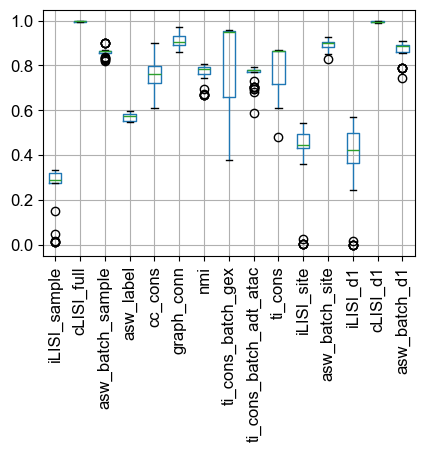

In [14]:
scores.drop("dims").T.boxplot(rot=90)

In [15]:
scores.shape

(16, 37)

In [16]:
scores = scores.T

In [17]:
scores['seed'] = scores.index

In [18]:
scores['seed'] = scores['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])

In [19]:
def map_names(x):
    return 'totalVI' if 'totalVI' in x else \
                               'GD' if 'Winner' in x else \
                               'Liam site' if 'site' in x else \
                               'Liam rna only' if 'rna' in x else \
                               'Liam adt only' if 'adt' in x else \
                               'Liam concat' if 'concat' in x else \
                               'Liam CVAE' if 'CVAE' in x else \
                               'Liam' if 'BAVAE' in x else \
                               'Liam VAE'

In [20]:
scores['Model'] = scores.index.map(lambda x:
                                   map_names(x))

In [21]:
scores['Model'].value_counts()

Model
Liam             5
Liam rna only    5
Liam CVAE        5
Liam concat      5
totalVI          5
Liam adt only    5
GD               5
Liam VAE         1
Liam site        1
Name: count, dtype: int64

In [22]:
scores['seed'].value_counts()

seed
0      9
994    7
236    7
71     7
415    7
Name: count, dtype: int64

In [23]:
scores.drop(['dims', 'cLISI_full', 'ti_cons_batch_gex', 'ti_cons_batch_adt_atac', 'cLISI_d1'], axis=1, inplace=True)

In [24]:
scores = scores[['nmi', 'asw_label', 'cc_cons', 'ti_cons', 'asw_batch_sample', 'graph_conn', 'iLISI_sample', 'asw_batch_site', 'iLISI_site', 'asw_batch_d1', 'iLISI_d1', 'seed', 'Model']]

In [25]:
print(scores.groupby('Model')['seed'].value_counts().to_string())

Model          seed
GD             0       1
               236     1
               415     1
               71      1
               994     1
Liam           0       1
               236     1
               415     1
               71      1
               994     1
Liam CVAE      0       1
               236     1
               415     1
               71      1
               994     1
Liam VAE       0       1
Liam adt only  0       1
               236     1
               415     1
               71      1
               994     1
Liam concat    0       1
               236     1
               415     1
               71      1
               994     1
Liam rna only  0       1
               236     1
               415     1
               71      1
               994     1
Liam site      0       1
totalVI        0       1
               236     1
               415     1
               71      1
               994     1


In [26]:
seeds_default = ['0', '994', '236', '71', '415']

In [27]:
list_of_bio_metrics = ['nmi', 'asw_label', 'cc_cons', 'ti_cons'] 

In [28]:
list_of_batch_metrics = [ 'iLISI_sample', 'asw_batch_site', 'iLISI_site', 'asw_batch_d1', 'iLISI_d1']

In [29]:
def get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, list_of_seeds, list_of_models=None, rank_method='min'):
    
    scores_bio = scores[list_of_bio_metrics + ['seed', 'Model']]
    scores_batch = scores[list_of_batch_metrics + ['seed', 'Model']]
    
    scores_bio = scores_bio[scores_bio['seed'].isin(list_of_seeds)]
    scores_batch = scores_batch[scores_batch['seed'].isin(list_of_seeds)]
    
    if list_of_models is not None:
        scores_bio = scores_bio[scores_bio['Model'].isin(list_of_models)]
        scores_batch = scores_batch[scores_batch['Model'].isin(list_of_models)]

    
    scores_bio_ranks = scores_bio.groupby('seed').rank(axis=0, ascending=False, method=rank_method)
    scores_batch_ranks = scores_batch.groupby('seed').rank(axis=0, ascending=False, method=rank_method)

            
    
    scores_bio_ranks['seed'] = scores_bio_ranks.index
    scores_batch_ranks['seed'] = scores_batch_ranks.index


    scores_bio_ranks['seed'] = scores_bio_ranks['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])
    scores_batch_ranks['seed'] = scores_batch_ranks['seed'].apply(lambda x: x.split('_')[-1] if 'dims' not in x else x.split('_')[-2])

    
    scores_bio_ranks['Model'] = scores_bio_ranks.index.map(lambda x:
                                       map_names(x))
    scores_batch_ranks['Model'] = scores_batch_ranks.index.map(lambda x:
                                       map_names(x))
    
    scores_bio_ranks_mean = scores_bio_ranks.drop('seed', axis=1).groupby('Model').mean()
    scores_batch_ranks_mean = scores_batch_ranks.drop('seed', axis=1).groupby('Model').mean()

    scores_bio_ranks_mean['mean'] = scores_bio_ranks_mean.mean(axis=1)
    scores_batch_ranks_mean['mean'] = scores_batch_ranks_mean.mean(axis=1)


    scores_bio_ranks_mean = pd.concat([scores_bio_ranks_mean], keys=["Bio-conservation"], names=["Category"], axis=1)


    scores_batch_ranks_mean = pd.concat([scores_batch_ranks_mean], keys=["Batch correction"], names=["Category"], axis=1)

    ranks_df = pd.merge(scores_bio_ranks_mean, scores_batch_ranks_mean, left_index=True, right_index=True)

    bio_keys = scores_bio_ranks_mean.columns.values.tolist()

    batch_keys = scores_batch_ranks_mean.columns.values.tolist()

    return ranks_df, bio_keys, batch_keys

## Figure 3
Multiome:
- Liam
- totalVI
- GD

In [30]:
ranks_df, bio_keys, batch_keys = get_rank_table(scores, list_of_bio_metrics, list_of_batch_metrics, seeds_default, list_of_models=['Liam', 'totalVI', 'GD'], rank_method='min')

In [31]:
ranks_df

Category Bio-conservation                                 Batch correction  \
                      nmi asw_label cc_cons ti_cons  mean     iLISI_sample   
Model                                                                        
GD                    3.0       2.4     1.0     1.0  1.85              3.0   
Liam                  1.6       1.0     2.6     2.4  1.90              2.0   
totalVI               1.4       2.6     2.4     2.6  2.25              1.0   

Category                                                       
         asw_batch_site iLISI_site asw_batch_d1 iLISI_d1 mean  
Model                                                          
GD                  3.0        3.0          3.0      3.0  3.0  
Liam                2.0        2.0          2.0      2.0  2.0  
totalVI             1.0        1.0          1.0      1.0  1.0

In [32]:
ranks_df_batch = ranks_df[batch_keys]

In [33]:
ranks_df_batch.index.name = None 

In [34]:
ranks_df_batch

Category Batch correction                                                     
             iLISI_sample asw_batch_site iLISI_site asw_batch_d1 iLISI_d1 mean
GD                    3.0            3.0        3.0          3.0      3.0  3.0
Liam                  2.0            2.0        2.0          2.0      2.0  2.0
totalVI               1.0            1.0        1.0          1.0      1.0  1.0

In [35]:
ranks_df_batch.columns = ranks_df_batch.columns.droplevel(level=0)

In [36]:
ranks_df_batch

,iLISI_sample,asw_batch_site,iLISI_site,asw_batch_d1,iLISI_d1,mean
GD,3.0,3.0,3.0,3.0,3.0,3.0
Liam,2.0,2.0,2.0,2.0,2.0,2.0
totalVI,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
# rename columns, asw_batch gets named lLISI such that it has the same width as iLISI and gets postprocessed

In [38]:
ranks_df_batch.columns = pd.MultiIndex.from_tuples((("iLISI", "sample"), ("lLISI", "site"), ("iLISI", "site"), ("lLISI", "d1"), ("iLISI", "d1"), ("", "mean")))

In [39]:
ranks_df_batch

,iLISI,lLISI,iLISI,lLISI,iLISI,
,sample,site,site,d1,d1,mean
GD,3.0,3.0,3.0,3.0,3.0,3.0
Liam,2.0,2.0,2.0,2.0,2.0,2.0
totalVI,1.0,1.0,1.0,1.0,1.0,1.0


In [40]:
# sorting
ranks_df_batch = ranks_df_batch[['lLISI', 'iLISI', '']].loc[['Liam', 'totalVI', 'GD']]


In [41]:
ranks_df_batch

lLISI       iLISI               
         site   d1 sample site   d1 mean
Liam      2.0  2.0    2.0  2.0  2.0  2.0
totalVI   1.0  1.0    1.0  1.0  1.0  1.0
GD        3.0  3.0    3.0  3.0  3.0  3.0

In [42]:
index_names = {
    'selector': '.index_name',
    'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}

headers = {
    'selector': 'th:not(.index_name)',
    'props': 'text-align: center; font-family: Arial; font-weight: bold; font-size: 10pt'}


content = {'selector': 'td', 'props': 'text-align: center; font-weight: normal; font-size: 10pt'}

title = {'selector': 'caption',
    'props': [
        ('font-family', 'Arial'),
        ('font-weight', 'bold'),
        ('font-size', '14px')
    ]}

In [43]:
df_styled_batch = ranks_df_batch.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("", "mean")], vmin=1, vmax=3)


In [44]:
df_styled_batch

In [45]:
# dfi.export(df_styled_batch, 'figures/CU_base_batch_removal_ranks_CITE.pdf', table_conversion='matplotlib', dpi=600, fontsize=8)

In [46]:
dfi.export(df_styled_batch, 'figures/CU_base_batch_removal_ranks_CITE_10.pdf', table_conversion='matplotlib', dpi=600, fontsize=10)

In [47]:
ranks_df_bio = ranks_df[bio_keys]

In [48]:
ranks_df_bio.index.name = None 

In [49]:
ranks_df_bio.columns = ranks_df_bio.columns.droplevel(level=0)

In [50]:
ranks_df_bio

,nmi,asw_label,cc_cons,ti_cons,mean
GD,3.0,2.4,1.0,1.0,1.85
Liam,1.6,1.0,2.6,2.4,1.90
totalVI,1.4,2.6,2.4,2.6,2.25


In [51]:
# sorting
ranks_df_bio = ranks_df_bio.loc[['Liam', 'totalVI', 'GD']]


In [52]:
ranks_df_bio

,nmi,asw_label,cc_cons,ti_cons,mean
Liam,1.6,1.0,2.6,2.4,1.90
totalVI,1.4,2.6,2.4,2.6,2.25
GD,3.0,2.4,1.0,1.0,1.85


In [53]:
df_styled_bio = ranks_df_bio.style.set_table_styles([content, index_names, headers, title]).format(precision=1).background_gradient(axis=0, subset=[("mean")], vmin=1, vmax=3)


In [54]:
df_styled_bio

,nmi,asw_label,cc_cons,ti_cons,mean
Liam,1.6,1.0,2.6,2.4,1.9
totalVI,1.4,2.6,2.4,2.6,2.2
GD,3.0,2.4,1.0,1.0,1.9


In [55]:
# dfi.export(df_styled_bio, 'figures/CU_base_bio_cons_ranks_CITE.pdf', table_conversion='matplotlib', dpi=600, fontsize=8)

In [56]:
dfi.export(df_styled_bio, 'figures/CU_base_bio_cons_ranks_CITE_10.pdf', table_conversion='matplotlib', dpi=600, fontsize=10)